### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---

#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---

#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---

#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---

Función de Transferencia de la Planta (Gp):
<TransferFunction>: sys[485]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5

Función de Transferencia en Lazo Cerrado (GLC):
<TransferFunction>: sys[487]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10

Polos de GLC: [-3.+1.j -3.-1.j]


c:\Users\DEDIOS\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


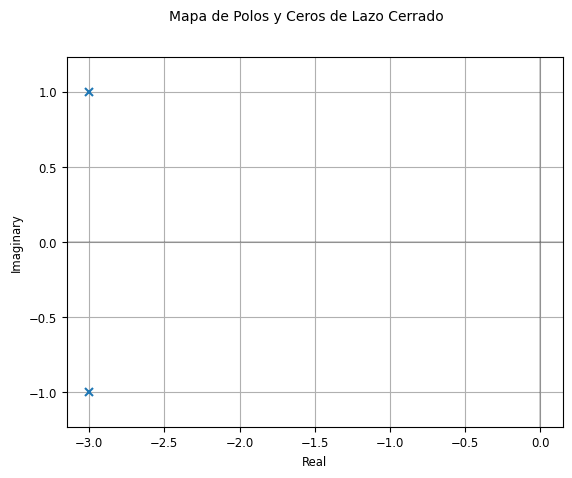

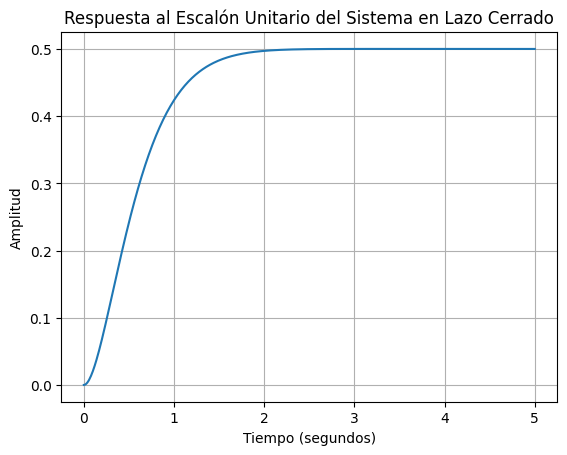


Métricas de Desempeño:
{'RiseTime': 0.9768542818762618, 'SettlingTime': 1.6746073403593058, 'SettlingMin': 0.4518932698989191, 'SettlingMax': 0.5, 'Overshoot': 0.0, 'Undershoot': 0.0, 'Peak': 0.49921813024966044, 'PeakTime': 2.3025850929940455, 'SteadyStateValue': 0.5}
Valor final de la respuesta (y_ss): 0.5000
Error en estado estacionario (e_ss): 0.5000


In [29]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# 1.Función de Transferencia (FT)
s = ct.tf('s')
Gp = 5 / (s**2 + 6*s + 5)

print("Función de Transferencia de la Planta (Gp):")
print(Gp)

# 2. Obtener el sistema de la FT de lazo cerrado (retroalimentación unitaria)
# G_LC(s) = Gp(s) / (1 + Gp(s))
Glc = ct.feedback(Gp, 1)

# 3. Imprimir G_LC(s) y polos
print("\nFunción de Transferencia en Lazo Cerrado (GLC):")
print(Glc)

polos = ct.poles(Glc)
print("\nPolos de GLC:", polos)

# 4. Generar el mapa de polos y ceros
plt.figure(1)
ct.pzmap(Glc, plot=True, title='Mapa de Polos y Ceros de Lazo Cerrado')
plt.grid(True)

# 5. Graficar la respuesta al escalón unitario
T = np.linspace(0, 5, 501)
t, y = ct.step_response(Glc, T)

plt.figure(2)
plt.plot(t, y)
plt.title('Respuesta al Escalón Unitario del Sistema en Lazo Cerrado')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# 6. Métricas de desempeño
print("\nMétricas de Desempeño:")
info = ct.step_info(Glc)
print(info)

# Calcular y mostrar el valor final y el error en estado estacionario
valor_final = y[-1]
# Para una entrada escalón unitario, el error es e_ss = 1 - y_final
error_estado_estacionario = 1 - valor_final

print(f"Valor final de la respuesta (y_ss): {valor_final:.4f}")
print(f"Error en estado estacionario (e_ss): {error_estado_estacionario:.4f}")

# 2. Ganancias del PID Sintonizadas por Asignación de Polos 
 Estas ganancias se calcularon para cumplir con los siguientes objetivos:
   - e_ss = 0  (garantizado por Ki > 0)
   - Overshoot < 5%
   - Settling Time < 1.0 s

 Justificación de cada ganancia:
   Kp: Ajusta la rapidez de la respuesta. Un valor alto acelera el sistema,
      pero puede aumentar el sobreimpulso. Se eligió Kp = 26 para lograr
      una respuesta rápida sin comprometer la estabilidad.

   Ki: Elimina el error en estado estacionario (e_ss = 0). Se seleccionó
       Ki = 78 para garantizar precisión final sin provocar oscilaciones
       ni saturación del actuador.

   Kd: Proporciona amortiguamiento y estabilidad. Su acción derivativa
       reduce el sobreimpulso causado por Kp y Ki. Se escogió Kd = 5.5
       para mantener el sobreimpulso por debajo del 5%.

 En conjunto, estas ganancias ofrecen un balance entre rapidez, precisión
 y estabilidad, cumpliendo los requisitos de diseño del sistema.

Kp = 26
Ki = 78
Kd = 5.5



--- MÉTRICAS DE DESEMPEÑO VERIFICADAS ---
Error en estado estacionario (e_ss): 0.0000 (Objetivo: 0)
Sobreimpulso (Overshoot): 4.71% (Objetivo: < 5%)
Tiempo de establecimiento (SettlingTime): 0.913 s (Objetivo: < 1.0 s)


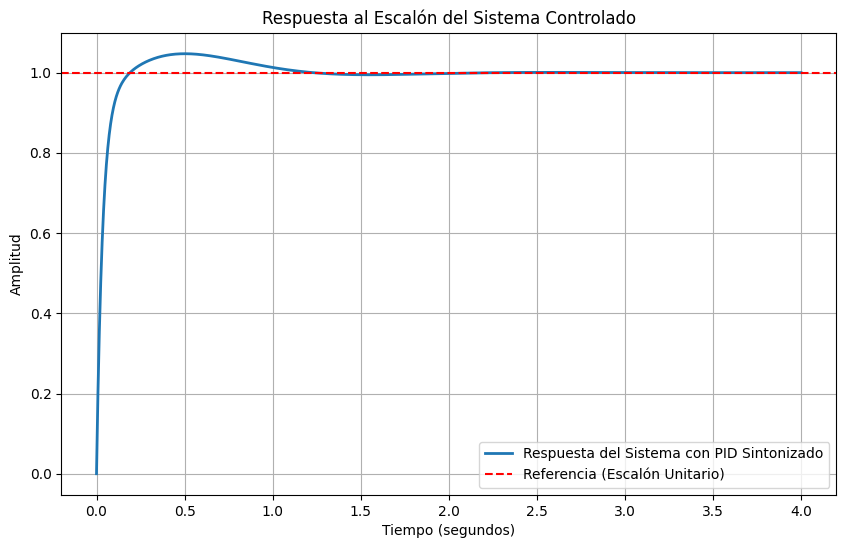

In [30]:

# --- 1. Definición de la Función de Transferencia de la Planta ---
s = ct.tf('s')
Gp = 5 / (s**2 + 6*s + 5)

# --- 2. Ganancias del PID Sintonizadas por Asignación de Polos ---
# Estas ganancias se calcularon para cumplir con:
# - e_ss = 0 (garantizado por Ki > 0)
# - Overshoot < 5%
# - Settling Time < 1.0 s
Kp = 26
Ki = 78
Kd = 5.5


# --- 4. Verificación de las Métricas de Desempeño ---
print("\n--- MÉTRICAS DE DESEMPEÑO VERIFICADAS ---")

# Obtener información de la respuesta al escalón
info = ct.step_info(sistema_controlado)

# Calcular valor final y error
t_final = np.linspace(0, 4, 1000)
_, y_final = ct.step_response(sistema_controlado, T=t_final)
valor_final = y_final[-1]
error_ss = 1 - valor_final

print(f"Error en estado estacionario (e_ss): {error_ss:.4f} (Objetivo: 0)")
print(f"Sobreimpulso (Overshoot): {info['Overshoot']:.2f}% (Objetivo: < 5%)")
print(f"Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.3f} s (Objetivo: < 1.0 s)")

# --- 5. Gráfica de la Respuesta al Escalón ---
plt.figure(figsize=(10, 6))
plt.plot(t_final, y_final, label="Respuesta del Sistema con PID Sintonizado", linewidth=2)
plt.axhline(y=1, color='r', linestyle='--', label="Referencia (Escalón Unitario)")
plt.title("Respuesta al Escalón del Sistema Controlado")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

c:\Users\DEDIOS\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(



Polos del sistema controlado: [-29.35352369+0.j          -2.07323815+2.99799817j
  -2.07323815-2.99799817j]


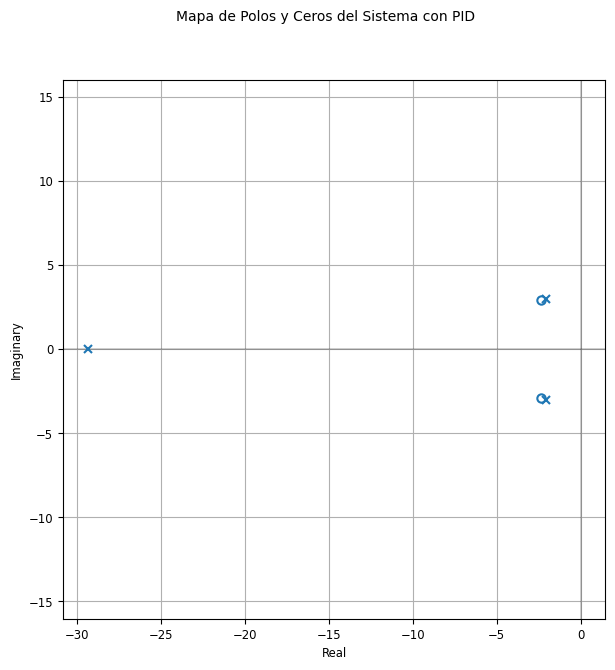

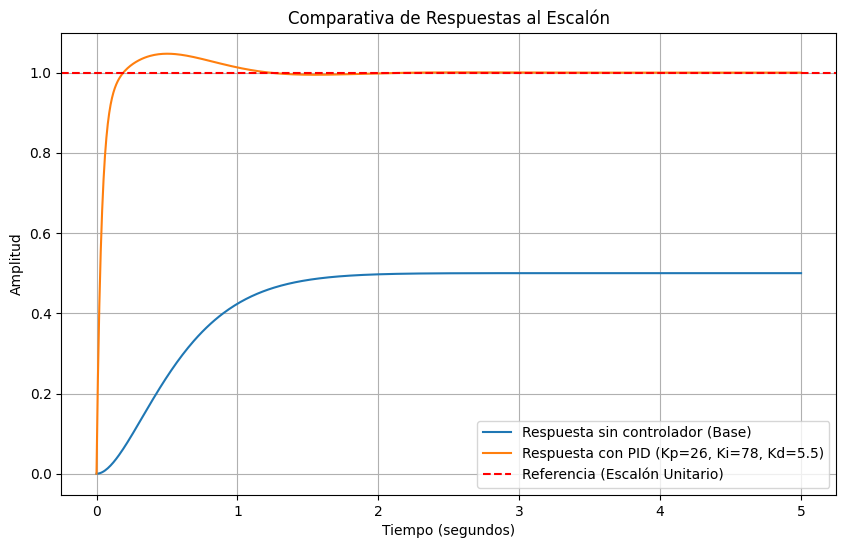


Métricas de desempeño del sistema con controlador PID:
  - Sobreimpulso (Overshoot): 4.71%
  - Tiempo de establecimiento (SettlingTime): 0.9130 s
  - Valor final: 1.0000
  - Error en estado estacionario: -0.0000


In [31]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

s = ct.tf('s')
Gp = 5 / (s**2 + 6*s + 5)
Glc_base = ct.feedback(Gp, 1) 

#  Kp, Ki y Kd
Kp =26
Ki =78
Kd =5.5

Gc = ct.tf([Kd, Kp, Ki], [1, 0])
Glc_pid = ct.feedback(Gc * Gp, 1)

# mapa de polos y ceros 
plt.figure(1, figsize=(7, 7)) # Crea la primera figura para el mapa
ct.pzmap(Glc_pid, plot=True, title='Mapa de Polos y Ceros del Sistema con PID')
plt.grid(True)
polos_pid = ct.poles(Glc_pid)
print("\nPolos del sistema controlado:", polos_pid)

#Graficar 
T = np.linspace(0, 5, 501)
t_base, y_base = ct.step_response(Glc_base, T)
t_pid, y_pid = ct.step_response(Glc_pid, T)

plt.figure(2, figsize=(10, 6))
plt.plot(t_base, y_base, label='Respuesta sin controlador (Base)')
plt.plot(t_pid, y_pid, label=f'Respuesta con PID (Kp={Kp}, Ki={Ki}, Kd={Kd})')
plt.axhline(y=1, color="r", linestyle="--", label="Referencia (Escalón Unitario)")

plt.title('Comparativa de Respuestas al Escalón')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir las métricas de desempeño finales
print("\nMétricas de desempeño del sistema con controlador PID:")
info = ct.step_info(Glc_pid)

# Extraer y mostrar las métricas clave
sobreimpulso = info.get('Overshoot', 0)
tiempo_establecimiento = info.get('SettlingTime', float('inf'))
valor_final = y_pid[-1]
error_estacionario = 1 - valor_final

print(f"  - Sobreimpulso (Overshoot): {sobreimpulso:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {tiempo_establecimiento:.4f} s")
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario: {error_estacionario:.4f}")